In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('percentage-possible-sunshine-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_air_temperature,mean_wind_speed,mean_relative_humidity,total_sunshine_duration,solar_radiation,percentage_possible_sunshine
0,Jan-10,75.5,-3.4,5.5,75,40.4,3.8,14
1,Feb-10,109.5,-4.9,4.1,74,48.8,6.2,17
2,Mar-10,100.5,-1.4,4.7,68,108.0,10.5,29
3,Apr-10,94.0,3.5,4.3,77,146.2,13.9,36
4,May-10,76.5,7.3,4.9,86,168.6,16.5,37


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.9799505928850945


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[15.30068823 15.79844091 28.62115389 36.23622102 39.14403963 45.07902815
 13.52686166 40.41992468 53.48401057 45.88986439 21.43652997 13.6192142
 19.85147829 25.446517   40.95714675 33.57088619 31.45173677 22.74372724
 28.7183978  42.04101996 44.27368525 42.01103494 27.14866084 14.186066
 15.96732883 22.46097974 36.00855137 50.32023644 31.59635767 48.38702973
 24.58492765 36.02467302 32.73334861 35.8832557  13.21516728  9.2571651
 14.78943157 18.53206354 25.16520566 40.14907963 25.45035833 41.03917652
 46.78728016 25.3748631  39.58148542 40.53045592 24.13977622 13.68349939
 17.2150409  28.10816297 50.62292881 53.10117018 30.75838072 38.32375156
 35.24269221 43.11315858 40.84653963 42.20774949 33.20017257 11.58740949
 18.85734555 24.38677724 31.95631754 43.51069962 42.63954639 25.76308218
 27.18258521 30.22502278 44.99818501 34.6840883  27.74931156 20.08513968
 10.50481381 11.82350702 38.3726137  36.30378031 59.46355011 35.94753529
 35.87597783 39.79346457 39.783612

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.413156503592988
Mean Squared Error: 3.501259987834544
Root Mean Squared Error: 1.87116540899904


Text(0.5, 1.0, 'Percentage possible sunshine - actual and predicted values')

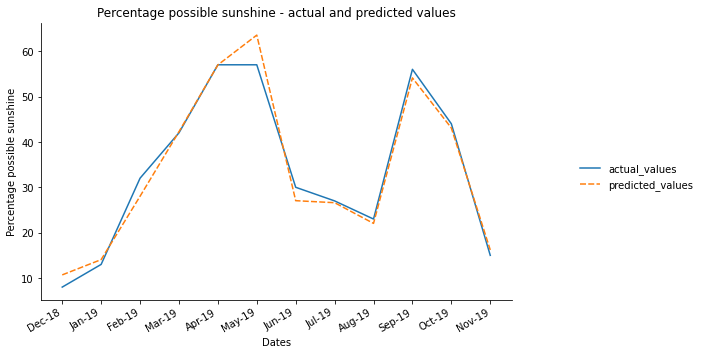

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Percentage possible sunshine') #set the label for the y-axis
plt.title('Percentage possible sunshine - actual and predicted values') #set the title of the graph